In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
weather = pd.read_csv("C:/Users/shams/OneDrive/Desktop/All_project/Intro_to_stat_analysis_proj/weatherHistory.csv")
weather.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [ ]:
"""The CSV file includes a hourly/daily summary for Szeged, Hungary area, between 2006 and 2016.It is a very large data set
with dimension (96453,12).
My analysis was to find is there a relationship between humidity and temperature? What about between humidity and apparent
Temperature."""

In [ ]:
"""Data Background"""
"""
4-year air temperature data from June 2014 to May 2018 in  10-min averages were used based  on  1-min measurements. 
To  compare  temperature  modifying effects of different LCZs in Szeged LCZ averages were used. Consequently, 
in case of LCZ 2 and 3 it means only one station, however in LCZ 6 the average of ten stations  was  used according 
to the size  of this LCZ class.  
Available from: 
https://www.researchgate.net/publication/
327867323_Weather_and_climate_modeling_possibilities_using_local_climate_zone_concept_and_
observation_network_in_Szeged_Hungary [accessed Dec 08 2020].
"""

In [26]:
weather[weather.isnull().any(axis=1)]

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
52672,2012-04-11 16:00:00.000 +0200,Mostly Cloudy,NaN,19.016667,19.016667,0.26,14.8764,163.0,9.982,0.0,1002.40,Mostly cloudy until night.
52674,2012-04-11 18:00:00.000 +0200,Mostly Cloudy,NaN,17.850000,17.850000,0.28,13.7977,169.0,9.982,0.0,1001.79,Mostly cloudy until night.
52675,2012-04-11 19:00:00.000 +0200,Mostly Cloudy,NaN,16.322222,16.322222,0.32,10.8192,151.0,9.982,0.0,1001.60,Mostly cloudy until night.
52677,2012-04-11 21:00:00.000 +0200,Mostly Cloudy,NaN,12.566667,12.566667,0.43,9.0160,159.0,9.982,0.0,1001.92,Mostly cloudy until night.
52678,2012-04-11 22:00:00.000 +0200,Mostly Cloudy,NaN,12.927778,12.927778,0.47,17.6295,197.0,16.100,0.0,1002.20,Mostly cloudy until night.
...,...,...,...,...,...,...,...,...,...,...,...,...
95584,2016-10-31 19:00:00.000 +0100,Mostly Cloudy,NaN,8.322222,7.044444,0.85,8.0339,290.0,0.000,0.0,1021.73,Mostly cloudy starting in the afternoon.
95585,2016-10-31 20:00:00.000 +0100,Mostly Cloudy,NaN,7.627778,6.183333,0.87,8.2271,293.0,0.000,0.0,1021.76,Mostly cloudy starting in the afternoon.
95586,2016-10-31 21:00:00.000 +0100,Mostly Cloudy,NaN,7.111111,5.511111,0.89,8.5008,297.0,0.000,0.0,1021.81,Mostly cloudy starting in the afternoon.
95587,2016-10-31 22:00:00.000 +0100,Partly Cloudy,NaN,6.672222,4.961111,0.90,8.6457,299.0,0.000,0.0,1021.83,Mostly cloudy starting in the afternoon.


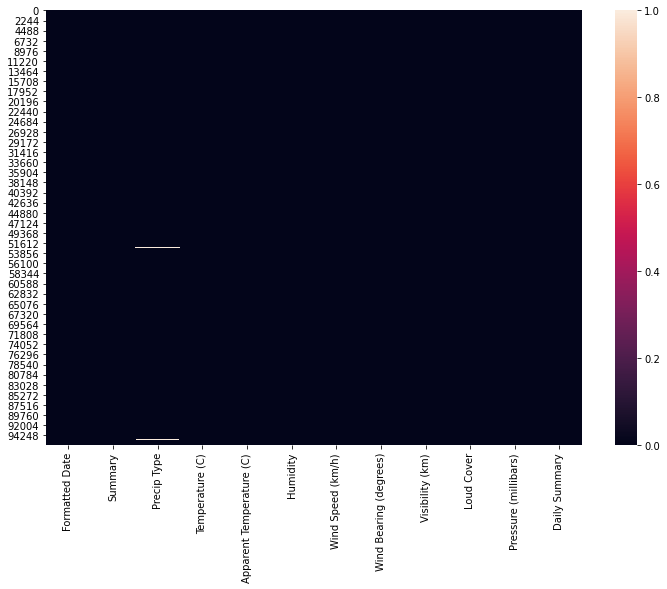

In [33]:
import seaborn as sns
plt.figure(figsize=(12,8))
weather.isna().sum()
sns.heatmap(weather.isna())

In [5]:
"""We can see that the Precip Type variable have some missing values, as the dataset is huge we will remove the rows"""
"""Dropping the missing values"""
dat1 = weather.dropna()
dat1.isna().sum()



Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
Daily Summary               0
dtype: int64

In [ ]:
"""We will perform a time analysis on the dataset, as time and season is an important componed for weather analysis"""
"""Time Analysis"""

In [6]:
dat1['Formatted Date'] = pd.to_datetime(dat1['Formatted Date'], utc=True)
dat1['Formatted Date']

C:\Users\shams\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0       2006-03-31 22:00:00+00:00
1       2006-03-31 23:00:00+00:00
2       2006-04-01 00:00:00+00:00
3       2006-04-01 01:00:00+00:00
4       2006-04-01 02:00:00+00:00
                   ...           
96448   2016-09-09 17:00:00+00:00
96449   2016-09-09 18:00:00+00:00
96450   2016-09-09 19:00:00+00:00
96451   2016-09-09 20:00:00+00:00
96452   2016-09-09 21:00:00+00:00
Name: Formatted Date, Length: 95936, dtype: datetime64[ns, UTC]

In [7]:
#Set index as "Date

dat_index = dat1.set_index('Formatted Date')
dat_index.head()

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
Formatted Date,,,,,,,,,,,
2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [8]:
data_columns = ['Apparent Temperature (C)', 'Humidity']
df_monthly_mean = dat_index[data_columns].resample('MS').mean()
df_monthly_mean.head()

,Apparent Temperature (C),Humidity
Formatted Date,,
2005-12-01 00:00:00+00:00,-4.050000,0.890000
2006-01-01 00:00:00+00:00,-4.173708,0.834610
2006-02-01 00:00:00+00:00,-2.990716,0.843467
2006-03-01 00:00:00+00:00,1.969780,0.778737
2006-04-01 00:00:00+00:00,12.098827,0.728625


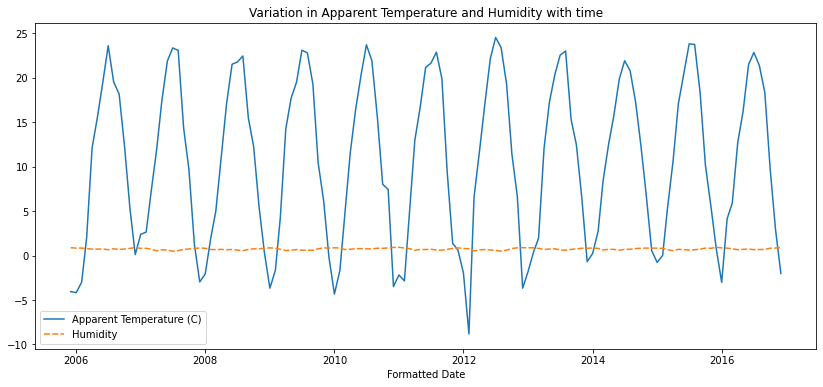

In [9]:
#Plotting Variation in Apparent Temperature and Humidity with time

import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

plt.figure(figsize=(14,6))
plt.title("Variation in Apparent Temperature and Humidity with time")
sns.lineplot(data=df_monthly_mean)

In [10]:
"""We can see a sinusoidal shaped variation of the apparent temperature with time which denotes the cycle of season. 
From 2006-2016 the Humidity has been pretty constant with no big variation. """

#retrieving the data of a particular month from every year, say April

df1 = df_monthly_mean[df_monthly_mean.index.month==4]
print(df1)

df1.dtypes

                           Apparent Temperature (C)  Humidity
Formatted Date                                               
2006-04-01 00:00:00+00:00                 12.098827  0.728625
2007-04-01 00:00:00+00:00                 11.894421  0.536361
2008-04-01 00:00:00+00:00                 11.183688  0.693194
2009-04-01 00:00:00+00:00                 14.267076  0.567847
2010-04-01 00:00:00+00:00                 11.639406  0.706875
2011-04-01 00:00:00+00:00                 12.978997  0.591625
2012-04-01 00:00:00+00:00                 11.780703  0.643583
2013-04-01 00:00:00+00:00                 12.045563  0.677667
2014-04-01 00:00:00+00:00                 12.486181  0.691403
2015-04-01 00:00:00+00:00                 10.632801  0.547764
2016-04-01 00:00:00+00:00                 12.731427  0.659972


Apparent Temperature (C)    float64
Humidity                    float64
dtype: object

Text(0.5, 0, 'Month of April')

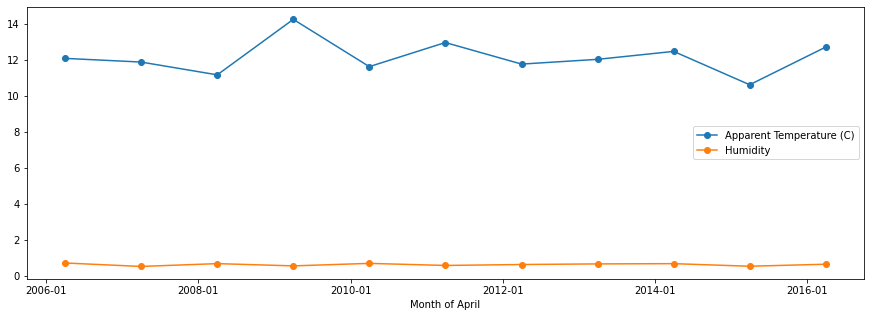

In [11]:

#Plotting each years Humidity and Temperature change

import matplotlib.dates as mdates
from datetime import datetime 

fig, ax = plt.subplots(figsize=(15,5))
ax.plot(df1.loc['2006-04-01':'2016-04-01', 'Apparent Temperature (C)'], marker='o', linestyle='-',label='Apparent Temperature (C)')
ax.plot(df1.loc['2006-04-01':'2016-04-01', 'Humidity'], marker='o', linestyle='-',label='Humidity')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.legend(loc = 'center right')
ax.set_xlabel('Month of April')

Text(0.5, 0, 'Month of April')

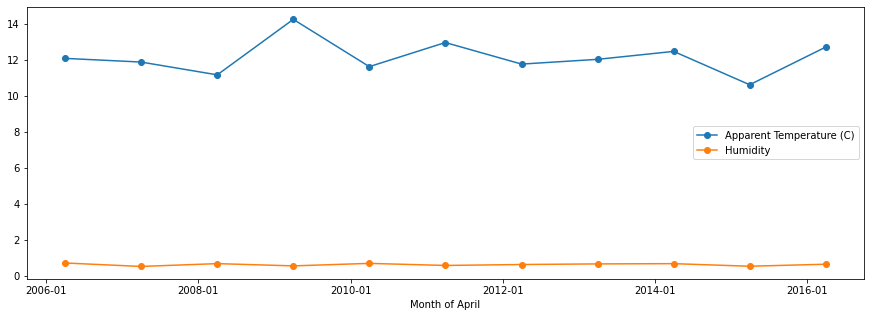

In [12]:
"""We performed more closer analysis on the month april. We can see that the apparent temperature does not fluctuate much
and changes a little in the range 10-15(C). So from the plot there the temperature is moderate without any dominant
changes and the humidity remains the same like the rest of the year"""
#Plotting each years Humidity and Temperature change

import matplotlib.dates as mdates
from datetime import datetime 

fig, ax = plt.subplots(figsize=(15,5))
ax.plot(df1.loc['2006-04-01':'2016-04-01', 'Apparent Temperature (C)'], marker='o', linestyle='-',label='Apparent Temperature (C)')
ax.plot(df1.loc['2006-04-01':'2016-04-01', 'Humidity'], marker='o', linestyle='-',label='Humidity')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.legend(loc = 'center right')
ax.set_xlabel('Month of April')

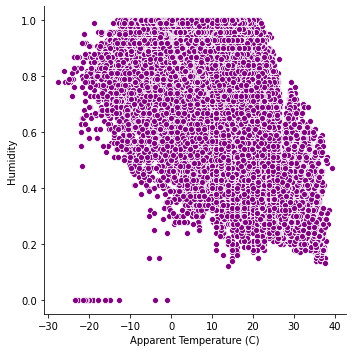

In [13]:
sns.relplot(data = dat1, x = "Apparent Temperature (C)", y = "Humidity", color = 'purple')

In [14]:
"""From the rel plot we can see the intensity of humidity with Apparent temperature. We can see some instances of zero 
level humidity at very cold temperatures"""

dat2 = dat1.drop(['Formatted Date','Loud Cover', 'Daily Summary'], axis =1)
dat2.head()

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13
1,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63
2,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41
4,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51


In [15]:
#in order to convert the categorical to dummy variables.

dat2_dummy = pd.get_dummies(dat2)
dat2_dummy.head()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Summary_Breezy,Summary_Breezy and Dry,Summary_Breezy and Foggy,...,Summary_Partly Cloudy,Summary_Rain,Summary_Windy,Summary_Windy and Dry,Summary_Windy and Foggy,Summary_Windy and Mostly Cloudy,Summary_Windy and Overcast,Summary_Windy and Partly Cloudy,Precip Type_rain,Precip Type_snow
0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,0,0,0,...,0,0,0,0,0,0,0,0,1,0


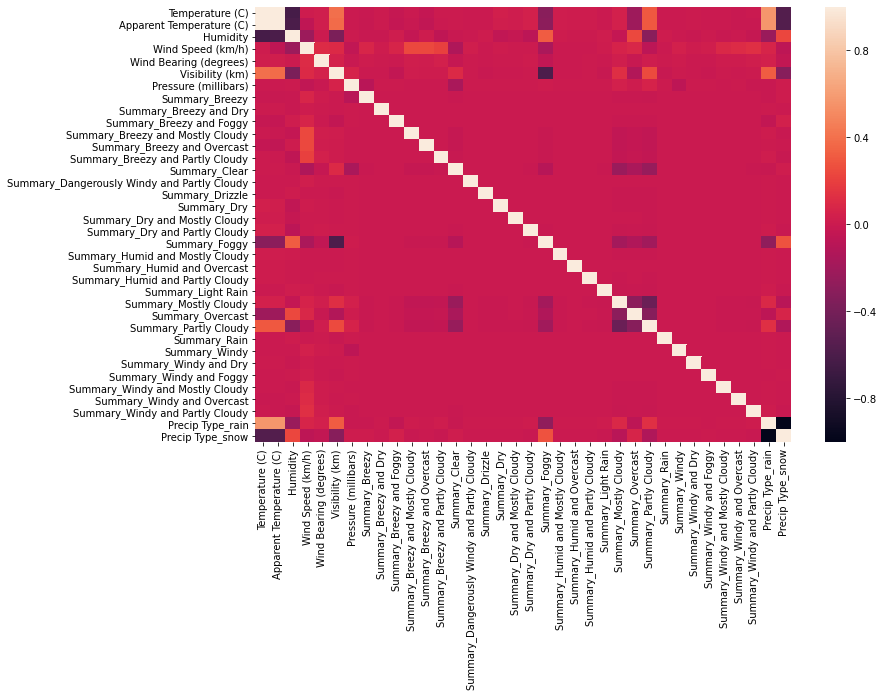

In [61]:
"""Lets plot the correlation plot to determine the correlation between the variables"""
plt.figure(figsize=(12,8))
sns.heatmap(dat2_dummy.corr())

In [ ]:
"""From the heatmap of the correlation plot we can see that Apparent Temperature is very positive correlated with the
Apparent Temperature denoting that they must have linear correlation between them, whereasHumidity is 
very negatively correlated with the Apparent Temperature. Also we can see that visibility is negatively correlated
with Humidity. 

In [37]:
#Now for the model

Y=dat2_dummy[['Apparent Temperature (C)']]
X=dat2_dummy.drop('Apparent Temperature (C)',axis=1)

In [38]:
Y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95936 entries, 0 to 96452
Data columns (total 1 columns):
Apparent Temperature (C)    95936 non-null float64
dtypes: float64(1)
memory usage: 1.5 MB


In [ ]:
sns.pairplot(dat2_dummy)

In [39]:
#Significance test
import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor




In [40]:
# define our intput
X1 = sm.add_constant(X)
# create a OLS model
model = sm.OLS(Y, X1)
# fit the data
est = model.fit()
print(est.summary())

                               OLS Regression Results                               
Dep. Variable:     Apparent Temperature (C)   R-squared:                       0.990
Model:                                  OLS   Adj. R-squared:                  0.990
Method:                       Least Squares   F-statistic:                 2.928e+05
Date:                      Tue, 08 Dec 2020   Prob (F-statistic):               0.00
Time:                              09:58:31   Log-Likelihood:            -1.4195e+05
No. Observations:                     95936   AIC:                         2.840e+05
Df Residuals:                         95902   BIC:                         2.843e+05
Df Model:                                33                                         
Covariance Type:                  nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

In [41]:
import statsmodels.api as sm
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(Y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
            cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)', 'Summary_Breezy', 'Summary_Breezy and Dry', 'Summary_Breezy and Foggy', 'Summary_Breezy and Mostly Cloudy', 'Summary_Breezy and Partly Cloudy', 'Summary_Clear', 'Summary_Dry', 'Summary_Dry and Mostly Cloudy', 'Summary_Dry and Partly Cloudy', 'Summary_Humid and Mostly Cloudy', 'Summary_Humid and Partly Cloudy', 'Summary_Mostly Cloudy', 'Summary_Overcast', 'Summary_Partly Cloudy', 'Summary_Windy and Foggy', 'Summary_Windy and Mostly Cloudy', 'Summary_Windy and Overcast', 'Summary_Windy and Partly Cloudy', 'Precip Type_rain', 'Precip Type_snow']


In [42]:
"""As we can see that the Summary_Windy contains the maximum p-value and is greater then the significance factor 0.05,
this variable is insignificant. So we need to remove summary_windy count and keep checking the p-values by removing 
insignificant variables until p-value is closer to zero"""
X1_opt = X1.drop('Summary_Windy', axis=1)
X1_opt=X1_opt.drop('Summary_Foggy',axis=1)
X1_opt=X1_opt.drop('Summary_Rain',axis=1)
X1_opt=X1_opt.drop('Summary_Drizzle',axis=1)
X1_opt=X1_opt.drop('Summary_Dangerously Windy and Partly Cloudy',axis=1)
X1_opt=X1_opt.drop('Summary_Light Rain',axis=1)
X1_opt=X1_opt.drop('Summary_Windy and Dry',axis=1)
X1_opt=X1_opt.drop('Summary_Humid and Overcast',axis=1)


# create a OLS model
model = sm.OLS(Y, X1_opt)
# fit the data
est = model.fit()
print(est.summary())


                               OLS Regression Results                               
Dep. Variable:     Apparent Temperature (C)   R-squared:                       0.990
Model:                                  OLS   Adj. R-squared:                  0.990
Method:                       Least Squares   F-statistic:                 3.716e+05
Date:                      Tue, 08 Dec 2020   Prob (F-statistic):               0.00
Time:                              09:58:43   Log-Likelihood:            -1.4195e+05
No. Observations:                     95936   AIC:                         2.840e+05
Df Residuals:                         95909   BIC:                         2.842e+05
Df Model:                                26                                         
Covariance Type:                  nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------

In [43]:
"""Removing the constant term"""
X1_opt2 = X1_opt.drop('const', axis=1)

In [44]:
"""Linear Regression model"""
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

X_train, X_test, Y_train, Y_test = train_test_split(X1_opt2, Y, test_size = 0.5, random_state = 1)


In [45]:
print(X_train.shape)
print(Y_train.shape)

(47968, 27)
(47968, 1)


In [46]:
lm = LinearRegression()
lm.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [47]:
Y_pred = lm.predict(X_test)

In [48]:
Y_pred_dataframe = pd.DataFrame(Y_pred, columns = ['Predicted_App Temp'])
Y_pred_dataframe.head()

,Predicted_App Temp
0,6.969721
1,5.258607
2,15.935838
3,23.027109
4,2.267791


In [49]:
Y_test

,Apparent Temperature (C)
37747,6.405556
50630,6.161111
91632,15.444444
30623,22.394444
71677,1.838889
...,...
15415,-1.816667
38415,-8.488889
28768,-5.794444
45247,19.933333


In [50]:
#lets grab the coefficients and intercept
Y_coeff = lm.coef_
Y_intercept = lm.intercept_
print(Y_coeff)


[[ 1.11573740e+00  7.35990645e-01 -1.04344707e-01  4.99374599e-04
   4.31574116e-03  1.69615367e-04 -1.11342986e+00  2.43973205e+00
  -1.83824067e+00  9.43096359e-01 -5.62890487e-02  6.78884920e-01
  -3.00063866e-01 -1.41017203e+00 -1.07339950e+00 -1.15543282e+00
  -5.63812735e-01 -4.80990781e-01 -2.12534186e-01 -2.99775469e-01
  -3.15938611e-01  1.81432460e+00  2.26193720e+00  6.65760108e-01
   1.02846618e+00  2.16353837e-01 -2.16353837e-01]]


In [51]:
from sklearn.metrics import mean_squared_error,r2_score
print(Y_intercept)
r2 = r2_score(Y_test,Y_pred)
print(lm.score(X_test,Y_test))
print("R^2 score: ",r2)
print('RMSE:', np.sqrt(mean_squared_error(Y_test, lm.predict(X_test))))

[-2.09910272]
0.9901798864537803
R^2 score:  0.9901798864537803
RMSE: 1.0614980989251768


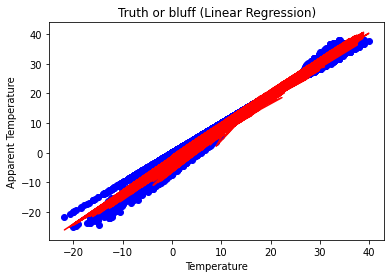

In [52]:
#DataFrame.as_matrix(columns=None)
Y_test.head()
plt.scatter(X_test['Temperature (C)'].values,Y_test.values, color = "blue" )
plt.plot(X_test['Temperature (C)'].values,Y_pred, color = "red")
plt.title("Truth or bluff (Linear Regression)")
plt.xlabel('Temperature')
plt.ylabel('Apparent Temperature')
plt.show()

In [53]:
Y_pred

array([[ 6.96972075],
       [ 5.25860737],
       [15.93583807],
       ...,
       [-4.49590698],
       [19.67576139],
       [17.97798901]])

In [54]:
"""First we will create a matrix of different containing nonlinear features"""
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
"""x1 as 1st feature, x^2 as second feature"""
X_poly = poly_reg.fit_transform(X_train)#b0+b1x1+b2x2^2
lm_poly = LinearRegression()
lm_poly.fit(X_poly,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [55]:
X_train['Humidity']

71989    0.65
39793    0.93
12157    0.67
82488    0.72
26755    0.33
         ... 
21440    0.67
73492    0.92
50057    0.65
5192     0.89
77851    0.96
Name: Humidity, Length: 47968, dtype: float64

In [56]:
Y_poly_pred = lm_poly.predict(X_poly)

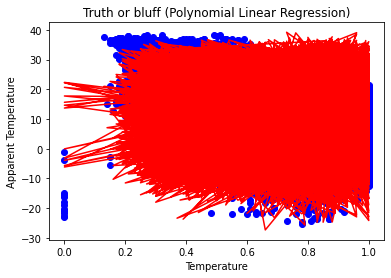

In [57]:
plt.scatter(X_test['Humidity'],Y_test, color = "blue" )
plt.plot(X_test['Humidity'],Y_poly_pred, color = "red")
plt.title("Truth or bluff (Polynomial Linear Regression)")
plt.xlabel('Temperature')
plt.ylabel('Apparent Temperature')
plt.show()

In [69]:
from sklearn.metrics import mean_squared_error,r2_score
r2 = -r2_score(Y_test,Y_poly_pred)
#print(lm_poly.score(X_test,Y_test))
print('R^2 score:',r2)
print('RMSE:', np.sqrt(mean_squared_error(Y_test, Y_poly_pred)))

R^2 score: 0.9911999745738618
RMSE: 15.11535686350149


In [ ]:
"""We can see that the polynomial regression performs a little bit better as the R^2 score is 0.99017 and 0.9911 for 
multiple regression and polynomial regression respectively"""

In [ ]:
"""Now we will apply ridge regression and lasso model to the dataset"""

In [70]:
from sklearn.linear_model import Ridge
from sklearn import model_selection
from sklearn.linear_model import RidgeCV



In [71]:
lm_ridge = Ridge()
lm_ridge.fit(X_train, Y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [72]:
lm_ridge.coef_

array([[ 1.11572046e+00,  7.36007021e-01, -1.04253523e-01,
         4.99560931e-04,  4.31536851e-03,  1.70605935e-04,
        -1.07803452e+00,  1.21881135e+00, -1.73216556e+00,
         9.37343303e-01, -5.82897501e-02,  6.73203411e-01,
        -2.99812778e-01, -1.34325586e+00, -9.20302546e-01,
        -1.13089373e+00, -5.33961094e-01, -4.43956363e-01,
        -2.12692300e-01, -3.00016258e-01, -3.15922070e-01,
         1.35833272e+00,  2.07064198e+00,  6.37045639e-01,
         9.89884640e-01,  2.16528251e-01, -2.16528251e-01]])

In [73]:
lm_ridge.intercept_

array([-2.10095029])

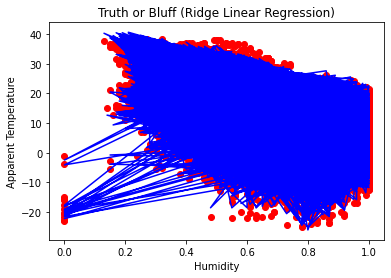

In [74]:
plt.scatter(X_test['Humidity'], Y_test, color = 'red')
plt.plot(X_test['Humidity'], lm_ridge.predict(X_test), color = 'blue')
plt.title('Truth or Bluff (Ridge Linear Regression)')
plt.xlabel('Humidity')
plt.ylabel('Apparent Temperature')
plt.show()

In [77]:
"""We can see that most of the predicted values well converge with the test values"""
"""Lets compute the R^2 score for validity"""

MSE_Ridge = metrics.mean_squared_error(Y_test, lm_ridge.predict(X_test))
print('MSE:', MSE_Ridge)
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, lm_ridge.
predict(X_test))))
r2 = r2_score(Y_test,lm_ridge.predict(X_test))
#print(lm_poly.score(X_test,Y_test))
print('R^2 score:',r2)

MSE: 1.126815266682861
RMSE: 1.061515551785682
R^2 score: 0.9901795635319004


In [80]:
"""We can see that R^2 score is 0.99018 which is denotes that ridge model performs very well"""
"""We’ll use cross validation to determine the optimal alpha value. By default, the ridge regression
cross validation class uses the Leave One Out strategy (k-fold).
We can compare the performance of our model with different alpha
values by taking a look at the mean square error."""
from sklearn.linear_model import RidgeCV
alphas = 10**np.linspace(10,-2,100)*0.5
#alphas=[0, 1, 1000, 1000000]
lm_ridge_opt = RidgeCV(alphas=alphas,scoring = "neg_mean_squared_error", cv =10, normalize = True)
lm_ridge_opt.fit(X_train, Y_train)
print("optimum shrinkage parameter using Ridge CV",lm_ridge_opt.alpha_)
print("MSE for Ridge CV",metrics.mean_squared_error(Y_test, lm_ridge_opt.predict(X_test)))
print("RMSE for RidgeCV",np.sqrt(metrics.mean_squared_error(Y_test, lm_ridge_opt.predict(X_test))))

optimum shrinkage parameter using Ridge CV 0.005
MSE for Ridge CV 1.1345524643911613
RMSE for RidgeCV 1.0651537280557963


In [81]:
r2 = r2_score(Y_test,lm_ridge_opt.predict(X_test))
#print(lm_poly.score(X_test,Y_test))
print('R^2 score:',r2)

R^2 score: 0.9901121321961862


In [82]:
"""So we can see the shrinkage parameter using ridge CV is about 0.05, with this optimal value we get good the RMSE value. Hence we choose alpha = 0.005 the
optimal shrinkage parameter"""

"""Now we perform the Lasso"""
from sklearn.linear_model import Lasso, LassoCV
lassocv = LassoCV(alphas = alphas, cv = 10, max_iter = 100000, normalize = True)
lassocv.fit(X_train, Y_train)
#lasso.set_params(alpha=lassocv.alpha_)
#lasso.fit(X_opt, Y_opt)
print("MSE",metrics.mean_squared_error(Y_test, lassocv.predict(X_test)))
print("RMSE",np.sqrt(metrics.mean_squared_error(Y_test, lassocv.predict(X_test))))
print("optimal shrinkage parameter for Lasso Model:", lassocv.alpha_)

MSE 2.8963302859859095
RMSE 1.7018608303812357
optimal shrinkage parameter for Lasso Model: 0.005


In [83]:
r2 = r2_score(Y_test,lassocv.predict(X_test))
#print(lm_poly.score(X_test,Y_test))
print('R^2 score:',r2)

R^2 score: 0.9747578610219854


In [ ]:
"""For the lasso cv model we can see the optimal shrinkage parameter is same and it is 0.005"""
"""From the lasso model we can see that the R^2 score is 0.974, hence the performance decline for this model. And multiple
regression , polynomial regression and ridge regression performs better then this model"""

In [86]:
"""Now we will apply another model Random forest with maximum depth 10"""
from sklearn.ensemble import RandomForestRegressor
lm_rf = RandomForestRegressor(max_depth= 10, random_state = 0, n_estimators = 10)
lm_rf.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [87]:
r2 = r2_score(Y_test,lm_rf.predict(X_test))
#print(lm_poly.score(X_test,Y_test))
print('R^2 score:',r2)

R^2 score: 0.9998736673437375


In [89]:
"""Random Forest with max depth 50"""
from sklearn.ensemble import RandomForestRegressor
lm_rf_50 = RandomForestRegressor(max_depth= 50, random_state = 0, n_estimators = 10)
lm_rf_50.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=50,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [90]:
r2 = r2_score(Y_test,lm_rf_50.predict(X_test))
#print(lm_poly.score(X_test,Y_test))
print('R^2 score:',r2)

R^2 score: 0.9999459787231981


In [93]:
"""Conclusion"""
from astropy.table import QTable, Table, Column
data_rows = [('Multiple Linear Regression', r2_score(Y_test,Y_pred)),( 'Polynomial Regression', -r2_score(Y_test,Y_poly_pred)),
             ('Ridge Regression', r2_score(Y_test,lm_ridge_opt.predict(X_test))),
             ('Lasso Model', r2_score(Y_test,lassocv.predict(X_test))),
             ('Random Forest model_ with depth 10', r2_score(Y_test,lm_rf.predict(X_test))),
             ('Random Forest model_ depth 50',r2_score(Y_test,lm_rf_50.predict(X_test))) ]
t = Table(rows=data_rows, names=('Model', 'R^2_score'))
print(t)

              Model                    R^2_score     
---------------------------------- ------------------
        Multiple Linear Regression 0.9901798864537803
             Polynomial Regression 0.9911999745738618
                  Ridge Regression 0.9901121321961862
                       Lasso Model 0.9747578610219854
Random Forest model_ with depth 10 0.9998736673437375
     Random Forest model_ depth 50 0.9999459787231981


In [ ]:
"""This is the summary of the models used and R^2 score. From the summary we can see that the Polynomial Linear
regression performs well with comparison to Multiple linear and ridge regression for this dataset. But the Random
Forest model with depth 50 perfroms the best with r^2 score of 0.9999"""